In [7]:
from sklearn.datasets import california_housing

In [10]:
data = california_housing.fetch_california_housing()
X = data['data']
y = data['target']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [22]:
from sklearn.feature_selection import RFE
selectors = []

for idx in list(range(1, 8, 1))[::-1]:
    estimator = LinearRegression(n_jobs=-1)
    rfe = RFE(estimator, idx, step=1)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    
    estimator.fit(X_train_rfe,y_train)
    score = estimator.score(X_test_rfe,y_test)
    selectors.append(np.array([rfe, score, idx]))

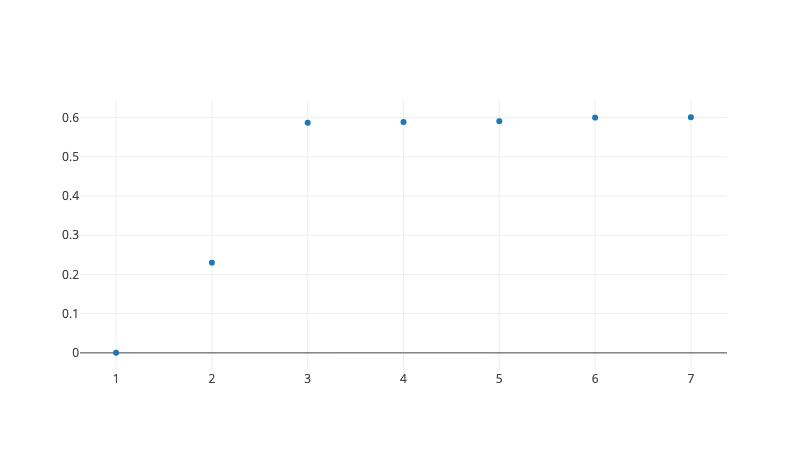

In [23]:
wrapped_selectors = np.array(selectors)
scores = wrapped_selectors[:, 1]
num_features = wrapped_selectors[:, -1]

from graph import plot, trace_values
trace = trace_values(num_features, scores)
plot([trace])

In [27]:
top_selector = selectors[-3]
top_selector

array([RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False),
  n_features_to_select=3, step=1, verbose=0),
       0.5870241539174605, 3], dtype=object)

In [28]:
top_selector = selectors[-3]
top_selector

top_rfe = top_selector[0]

top_rfe.ranking_

array([1, 4, 3, 2, 6, 5, 1, 1])

In [35]:
selected_X = X[:, top_rfe.support_]

In [34]:
features = np.array(data['feature_names'])
features[top_rfe.support_]

array(['MedInc', 'Latitude', 'Longitude'], dtype='<U10')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, test_size=0.33, random_state=23)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5846308644425722